# АРО лаб. 1

### Емелин Артем 3821М1ПМдс

---

## Загрузка MNIST из torchvision datasets

In [1]:
import torch
from torchvision import datasets
#from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics

In [140]:
num_of_train_samples = 2000
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=None
)
X_train = np.reshape(training_data.data[:num_of_train_samples, :, :].numpy(), (num_of_train_samples, 28 * 28))
y_train = training_data.targets[:num_of_train_samples].numpy()


num_of_test_samples = 100
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=None
)
X_test = np.reshape(test_data.data[:num_of_test_samples, :, :].numpy(), (num_of_test_samples, 28 * 28))
y_test = test_data.targets[:num_of_test_samples].numpy()

## Функции отрисовки данных

In [172]:
def draw_digit(digit_image, digit_value, predict_value = ""):
    plt.imshow(digit_image)
    if(predict_value == ""):
        plt.set_cmap('Greys')
        plt.axis('off')
        plt.text(1, 26, str(digit_value), color = 'b', fontsize = 20)
    else:
        if(digit_value == predict_value):
            plt.set_cmap('Greens')
            plt.text(1, 26, str(digit_value), color = 'b', fontsize = 20)
            plt.text(1, 6, str(predict_value), color = 'g', fontsize = 20)
        else:
            plt.set_cmap('Reds')
            plt.text(1, 26, str(digit_value), color = 'b', fontsize = 20)
            plt.text(1, 6, str(predict_value), color = 'r', fontsize = 20)
    plt.xticks([])
    plt.yticks([])

In [208]:
def draw_digit_array(X_test, y_test, y_predict, title = ""):
    fig = plt.figure(figsize = (20, 16))
    fig.suptitle(title, size = 26)
    
    for i in range(100):
        plt.subplot(10, 10, i + 1)
        draw_digit(X_test[i].reshape(28, 28), y_test[i], y_predict[i])

## Отрисовка цифр

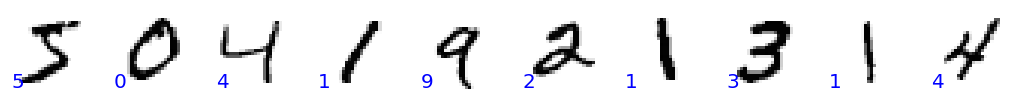

In [176]:
plt.figure(figsize = (18, 14))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    draw_digit(X_train[i].reshape(28, 28), y_train[i])

# Методы кластеризации

## KMeans

In [210]:
from sklearn.cluster import KMeans

In [211]:
KMeans_model = KMeans(n_clusters=10)
KMeans_model.fit(X_train)

KMeans(n_clusters=10)

In [212]:
y_predict = KMeans_model.predict(X_test)

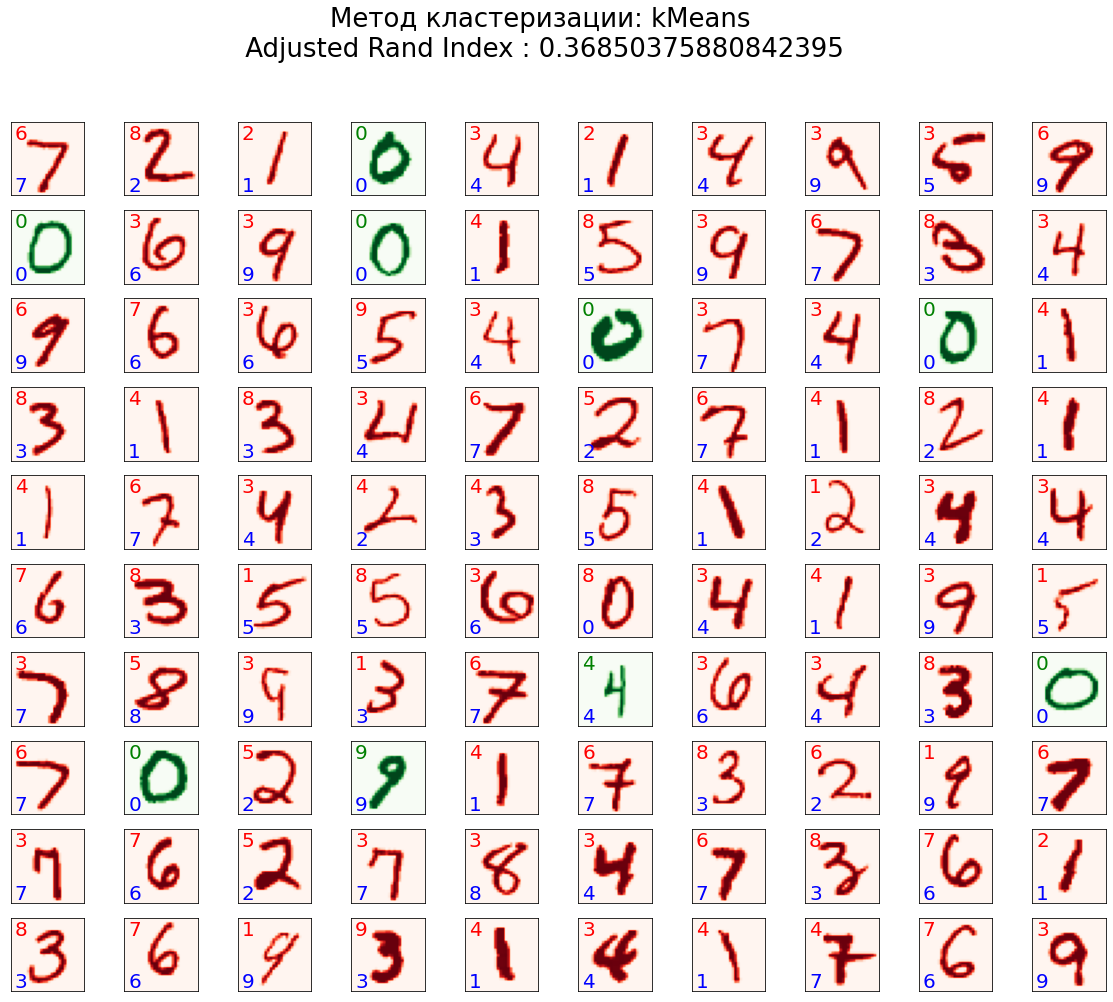

In [213]:
draw_digit_array(X_test, y_test, y_predict, "Метод кластеризации: kMeans\n Adjusted Rand Index : " + str(metrics.adjusted_rand_score(y_test, y_predict)))

## AffinityPropagation

In [214]:
from sklearn.cluster import AffinityPropagation

In [215]:
AffinityPropagation_model = AffinityPropagation(random_state = 0)
AffinityPropagation_model.fit(X_train)

AffinityPropagation(random_state=0)

In [216]:
y_predict = AffinityPropagation_model.predict(X_test)

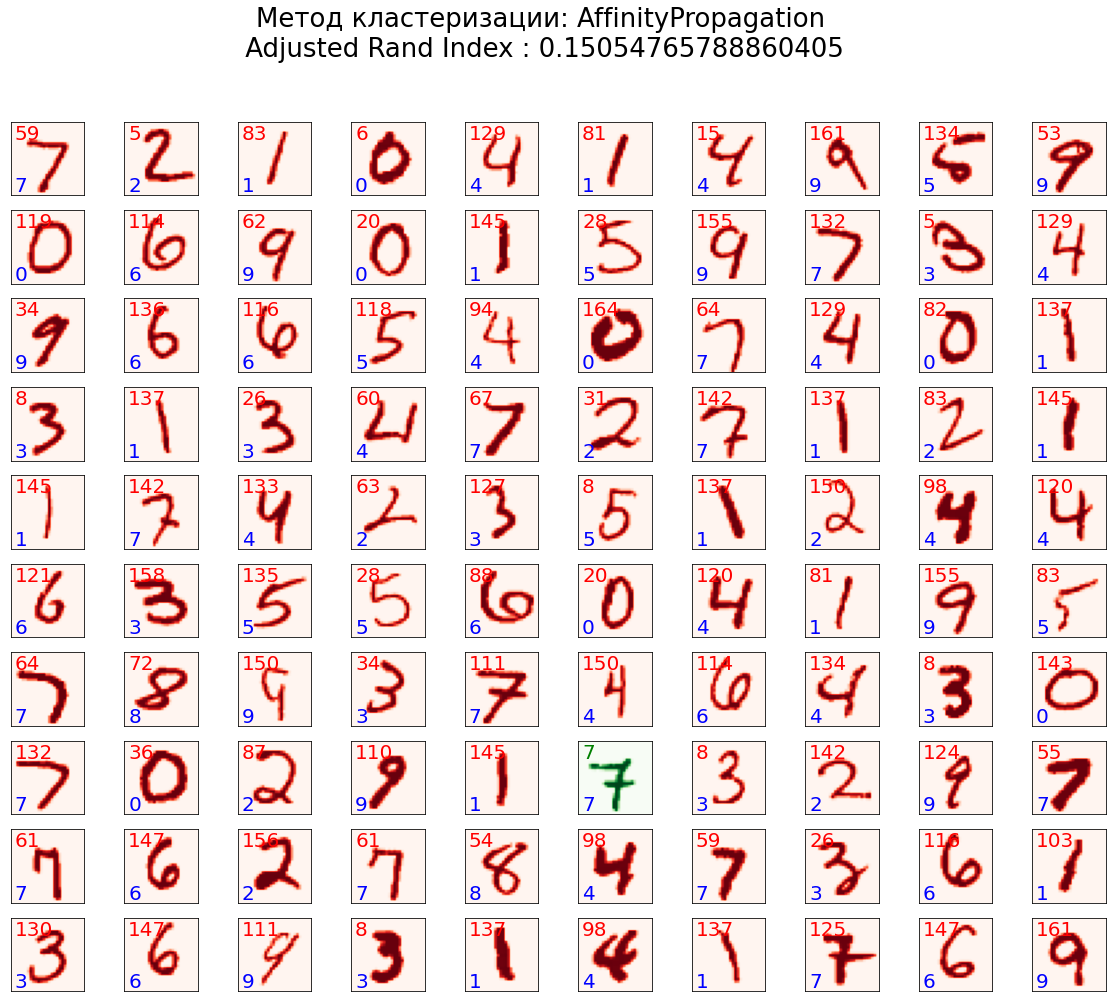

In [217]:
draw_digit_array(X_test, y_test, y_predict, "Метод кластеризации: kMeans\n Adjusted Rand Index : " + str(metrics.adjusted_rand_score(y_test, y_predict)))

## Mean Shift

In [221]:
from sklearn.cluster import MeanShift

In [226]:
MeanShift_model = MeanShift(bandwidth=2)
MeanShift_model.fit(X_train)

MeanShift(bandwidth=2)

In [227]:
y_predict = MeanShift_model.predict(X_test)

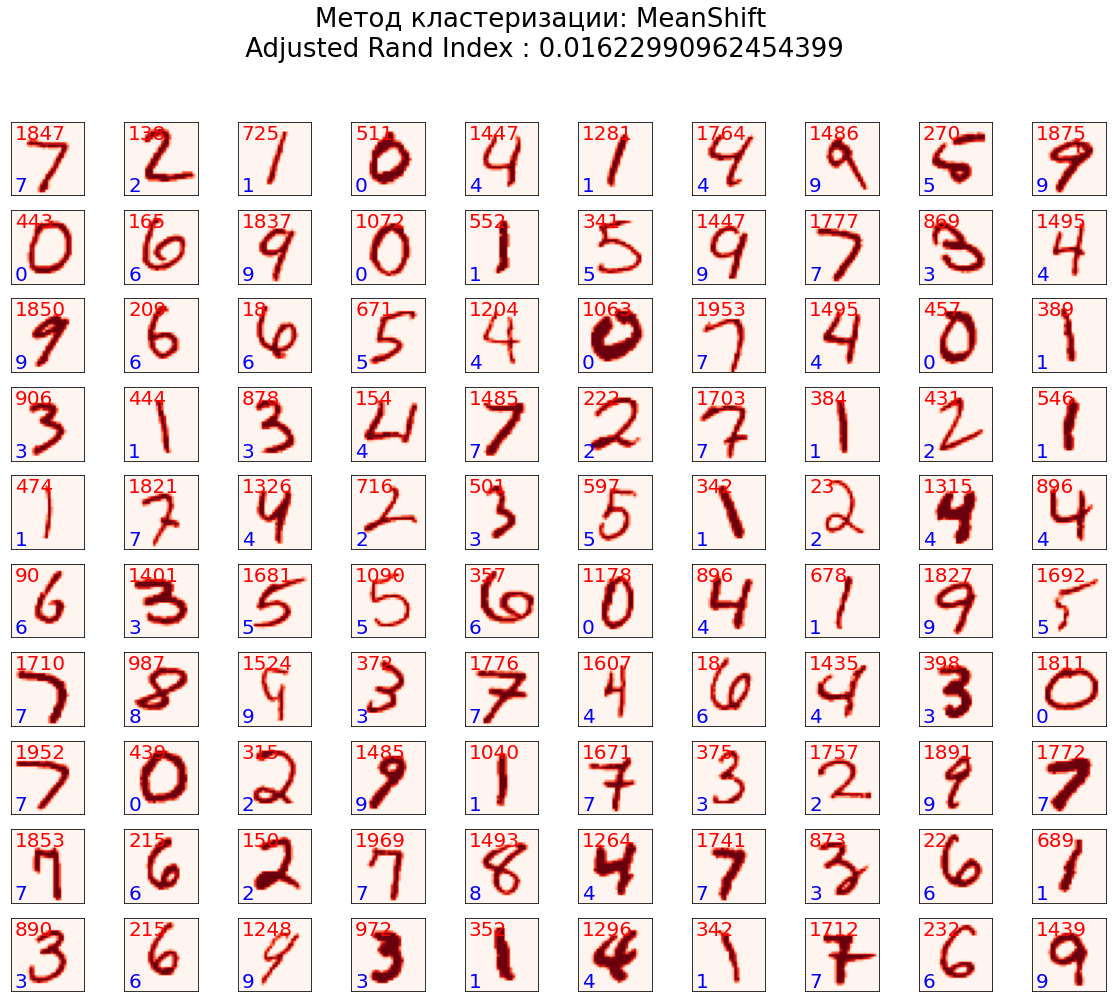

In [228]:
draw_digit_array(X_test, y_test, y_predict, "Метод кластеризации: MeanShift\n Adjusted Rand Index : " + str(metrics.adjusted_rand_score(y_test, y_predict)))

## Spectral clustering

In [230]:
from sklearn.cluster import SpectralClustering

In [233]:
SpectralClustering_model = SpectralClustering(n_clusters = 10, random_state=0)
SpectralClustering_model.fit(X_train)

C:\Users\artyo\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


SpectralClustering(n_clusters=10, random_state=0)

In [235]:
y_predict = SpectralClustering_model.fit_predict(X_test)

C:\Users\artyo\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


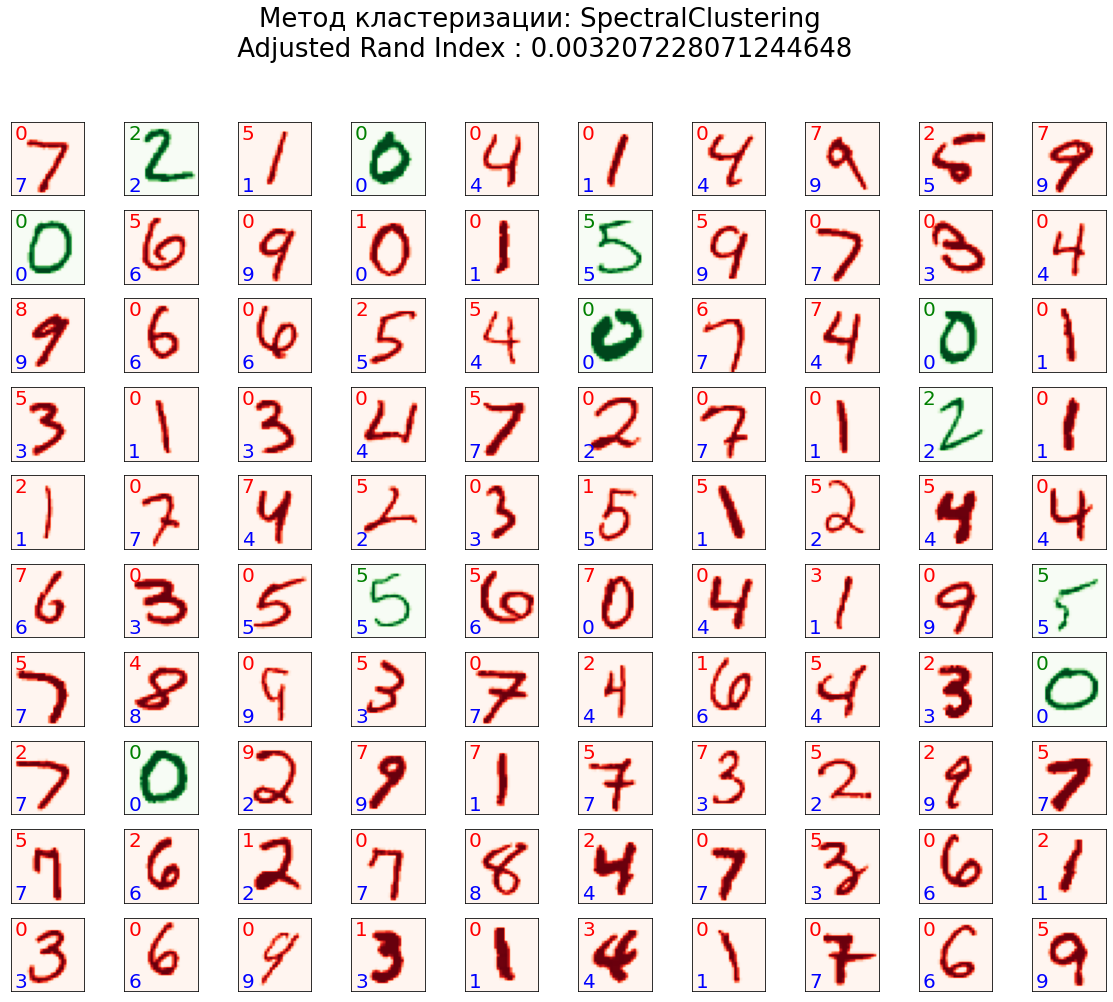

In [237]:
draw_digit_array(X_test, y_test, y_predict, "Метод кластеризации: SpectralClustering\n Adjusted Rand Index : " + str(metrics.adjusted_rand_score(y_test, y_predict)))

## DBSCAN

In [238]:
from sklearn.cluster import DBSCAN

In [240]:
DBSCAN_model = DBSCAN()
DBSCAN_model.fit(X_train)

DBSCAN()

In [242]:
y_predict = DBSCAN_model.fit_predict(X_test)

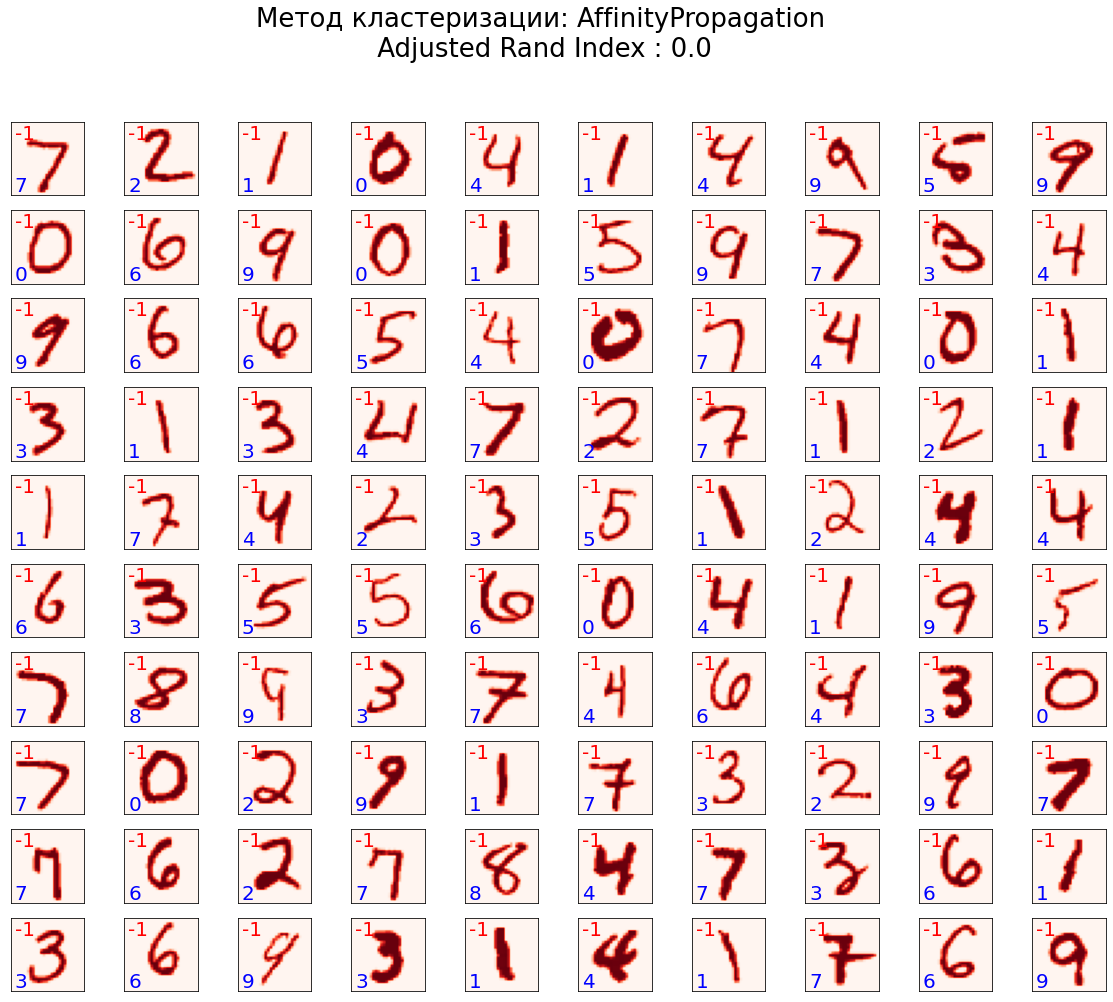

In [243]:
draw_digit_array(X_test, y_test, y_predict, "Метод кластеризации: AffinityPropagation\n Adjusted Rand Index : " + str(metrics.adjusted_rand_score(y_test, y_predict)))

0.37231540993886186